<a href="https://colab.research.google.com/github/MANOJ9590/Research_Lab-SS2022/blob/main/Covid-19_forecasting%20using_ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Corona Virus Predictions using ANN 



## Imports

In [6]:
from datetime import datetime, timedelta
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.pyplot import figure

## Data preprocessing -1


In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/MANOJ9590/Research_Lab-SS2022/main/Daily_data.csv",delimiter = ";",index_col=False)

In [8]:
data.drop(['Unnamed: 0'],inplace=True, axis=1)
data=data.dropna()
data=data.set_index('Date')
data =data.astype({"Deaths":float},errors='raise')
data =data.astype({"Confirmed Cases":float},errors='raise')

In [9]:
dates = np.array(data.index)
dates = [datetime.strptime(date, '%d.%m.%y').date() for date in dates]
dates = [x.strftime('%d/%m/%y') for x in dates]

confirmed_pk = np.array(data[['Confirmed Cases']])
deaths_pk = np.array(data[['Deaths']])
recovered_pk = np.array(data[['Recoveries']])

In [10]:
conf_death_recov = np.concatenate((confirmed_pk.reshape(-1,1), deaths_pk.reshape(-1,1), recovered_pk.reshape(-1,1)),  axis=1)

#np.set_printoptions(threshold=np.inf)
#print(conf_death_recov)

#print(len(confirmed_pk))
#print(len(deaths_pk))
#print(len(recovered_pk))
#print("------------")
print(len(conf_death_recov))
#conf_death_recov

753


In [11]:

df = pd.DataFrame(np.append(np.array(dates).reshape(-1,1), conf_death_recov, axis = 1), 
                  columns = ['Date', 'Confirmed Cases', 'Deaths', 'Recoveries'])
#df = df[df.Recoveries != 'nan']
df

,Date,Confirmed Cases,Deaths,Recoveries
0,25/02/20,16.0,0.0,14.0
1,26/02/20,21.0,0.0,15.0
2,27/02/20,26.0,0.0,16.0
3,28/02/20,53.0,0.0,16.0
4,29/02/20,66.0,0.0,16.0
...,...,...,...,...
748,23/06/22,27681775.0,140650.0,26340200.0
749,26/06/22,27681775.0,140650.0,26385600.0
750,27/06/22,27771911.0,140734.0,26479900.0
751,28/06/22,27914240.0,140847.0,26546500.0


In [14]:
confirmed_pk = np.array(df[['Confirmed Cases']])
deaths_pk = np.array(df[['Deaths']])
recovered_pk = np.array(df[['Recoveries']])
dates = df['Date'].tolist()

In [15]:
conf_death_recov = np.concatenate((confirmed_pk.reshape(-1,1), deaths_pk.reshape(-1,1), recovered_pk.reshape(-1,1)),  axis=1)


## Plotting Imported data

In [16]:
import plotly.graph_objects as go

In [17]:
df_c= df.astype({'Confirmed Cases': float},errors = 'raise')
df_d= df.astype({'Deaths': float},errors = 'raise')
df_r= df.astype({'Recoveries': float},errors = 'raise')

# dff= df.astype({'Confirmed Cases': float},errors = 'raise')
# dff= df.astype({'Deaths': float},errors = 'raise')
# dff= df.astype({'Recoveries': float},errors = 'raise')

In [18]:
fig = go.Figure()
fig.update_layout(title = "Historical data Plot")
#template ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
fig.update_layout(template='plotly_dark')
fig.update_xaxes(tickangle=90, showticklabels = True, type = 'category')
fig.add_trace(go.Scatter(x=df_c['Date'], 
                         y=df_c['Confirmed Cases'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)))

fig.add_trace(go.Scatter(x=df_d['Date'], 
                         y=df_d['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='red', width=2)))

fig.add_trace(go.Scatter(x=df_r['Date'], 
                         y=df_r['Recoveries'],
                         mode='lines+markers',
                         name='Recoveries',
                         line=dict(color='green', width=2)))

In [19]:
fig = go.Figure()
fig.update_layout(title = "Death data Plot")
#template ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
fig.update_layout(template='plotly_dark')
fig.update_xaxes(tickangle=90, showticklabels = True, type = 'category')


fig.add_trace(go.Scatter(x=df_d['Date'], 
                         y=df_d['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='red', width=2)))

## Datapreprocessing - 2

Processing input data into ploynomial form

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_reg = PolynomialFeatures(degree = 6)


Data in integer values with 1 column

In [22]:
input_data_simple = np.arange(0,len(confirmed_pk)) + 1


Data transformed into polynomial equation upto degree mentioned above

In [23]:
input_data = poly_reg.fit_transform(input_data_simple.reshape(-1,1))


Constructing Dataframe  with repaired Inputdata and dates 

In [24]:
inputData_dates = pd.Series(dates, index = input_data_simple)



##**Scaling (Standard_scaler)**


z = (x - u) / s

where 

*   u is the mean of the training samples or 0 if with_mean=False 
*   s is the standard deviation of the training samples or 1 if with_std=False



    

  

In [25]:
from sklearn.preprocessing import StandardScaler


In [26]:
scx = StandardScaler()
input_data_scaled = scx.fit_transform(input_data[:,1:])

## Generating future data

In [27]:
def generate_future_data(inp, days_to_get):
    prep_future_data_simple = (np.arange(0, days_to_get + 1) + inp[-1]).reshape(-1,1)
    generated_future_data = poly_reg.transform(prep_future_data_simple)
    scaled_gen_future_data = scx.transform(generated_future_data[:,1:])
    # Generating Dates
    lastDate = inputData_dates[inp[-1]]
    futureDates = [datetime.strptime(lastDate, '%d/%m/%y').date()]
    for i in range(days_to_get):
        futureDates.append(futureDates[-1] + timedelta(days=1))
    futureDates = [x.strftime('%d/%m/%y') for x in futureDates]
    
    return generated_future_data, scaled_gen_future_data, futureDates

 Averages

In [28]:
print('Average of Confirmed Cases: ',float(confirmed_pk[-1])/len(confirmed_pk))
print('Average of Deaths: ',float(deaths_pk[-1])/len(deaths_pk))
print('Average of Recoveries: ',float(recovered_pk[-1])/len(recovered_pk))


Average of Confirmed Cases:  37248.59229747676
Average of Deaths:  187.28021248339974
Average of Recoveries:  35332.138114209825


## Neural Network


**Neural network Design**

 Neural netrowk design

*  *Input layer* : 
  1.   Input layers =1
  2.   Neurons = 6


*  *Hidden layes* :

  1.   hidden layers = 1
  2.   Neurons =200
  3.   Activation function = rectifying linear activation function

*  *Output Layer*

  1.   Output layer = 1 
  2.   Neuron =3
    *   Confirmed 
    *   Deaths
    *   Recoveries 




Optimization/Training


Adam optimizer is used to train ANN with learning rate of 1e-1 and 500 iterations are performed for training. 

The loss function is used as mean square error between predictions and observations.

In [29]:
class annModel:
    def __init__(self, X_data, Y_data, hidden_neurons = 200, activation = 'relu', lear_rate = 1e-1):
        self.X_data = X_data
        self.Y_data = Y_data
        self.training = False
        input_samples, input_shape = self.X_data.shape
      
        try:
            output_samples, output_shape = self.Y_data.shape
        except:
            output_shape = 1
            
        self.annDesign = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(input_shape,)),
            tf.keras.layers.Dense(hidden_neurons, activation=activation),
            tf.keras.layers.Dense(output_shape),
        ])
        compiler = self.annDesign.compile(optimizer = tf.keras.optimizers.Adam(lear_rate), loss='mse', metrics=['MeanAbsoluteError'])
    def customize(self):
        return self.annDesign
    def summary(self):
        return self.annDesign.summary()
    def fit(self, epochs = 500):
        fitting = self.annDesign.fit(self.X_data, self.Y_data, epochs = epochs)
        self.training = True
        return fitting
    def predict(self, prediction_data):
        if self.training:
            predictions = self.annDesign.predict(prediction_data)
            return predictions
        else:
            print("use fit method to train model - Neural network model is not trained ")

##Predictions on Cases (Confirmed,Deaths & Recovories) with Designed ANN


### Evaluating Model on Train Test Splitted Data

To assess the model, the data was separated into train and test sets and labeled ann_model_for_evaluation. 

The goal of this part is to assess the model's performance and accuracy using available data. 

Training data is used to train and fit the model, and then test data is used to evaluate the model's efficiency and accuracy.




Splitting data into train-test sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
dates_train, dates_test = train_test_split(dates, test_size=0.05, shuffle=False)
input_train, input_test, output_train, output_test = train_test_split(input_data_scaled, conf_death_recov, test_size=0.05, shuffle=False)

In [32]:
print(len(input_test) + len(input_train))
print(len(dates_train) + len(dates_test))
print(len(output_train)+len(output_test))


753
753
753


Transforming into tensors of input-output data for ANN


In [33]:
input_train_tf = tf.convert_to_tensor(np.array(input_train), dtype=tf.float32)
input_test_tf = tf.convert_to_tensor(np.array(input_test), dtype=tf.float32)
output_train_tf = tf.convert_to_tensor(np.array(output_train), dtype=tf.float32)
output_test_tf = tf.convert_to_tensor(np.array(output_test), dtype=tf.float32)

In [35]:
# print(len(input_train_tf))
# print(len(input_test_tf))
# print(len(output_train_tf))
# print(len(output_test_tf))

# print(input_train_tf.shape)


Developed ANN model instance


In [36]:
ann_model_for_evaluation = annModel(input_train_tf, output_train_tf)

A model summary about layers shapes and number of paramaters/weights 


In [37]:
ann_model_for_evaluation.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1400      
                                                                 
 dense_1 (Dense)             (None, 3)                 603       
                                                                 
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


In [38]:
best_epochs = 4000

In [39]:
fitting_amfe = ann_model_for_evaluation.fit(best_epochs)

Streaming output truncated to the last 5000 lines.
23/23 [==============================] - 0s 3ms/step - loss: 17246306304.0000 - mean_absolute_error: 57667.6914
Epoch 1502/4000
23/23 [==============================] - 0s 3ms/step - loss: 17228496896.0000 - mean_absolute_error: 58061.7227
Epoch 1503/4000
23/23 [==============================] - 0s 3ms/step - loss: 17139557376.0000 - mean_absolute_error: 57562.3516
Epoch 1504/4000
23/23 [==============================] - 0s 3ms/step - loss: 17469145088.0000 - mean_absolute_error: 57767.5703
Epoch 1505/4000
23/23 [==============================] - 0s 3ms/step - loss: 17966688256.0000 - mean_absolute_error: 58379.8711
Epoch 1506/4000
23/23 [==============================] - 0s 3ms/step - loss: 17416867840.0000 - mean_absolute_error: 58216.0234
Epoch 1507/4000
23/23 [==============================] - 0s 3ms/step - loss: 17430548480.0000 - mean_absolute_error: 57589.1758
Epoch 1508/4000
23/23 [==============================] - 0s 4ms/step 

Covergence rate plotted for neural network loss function during optimization


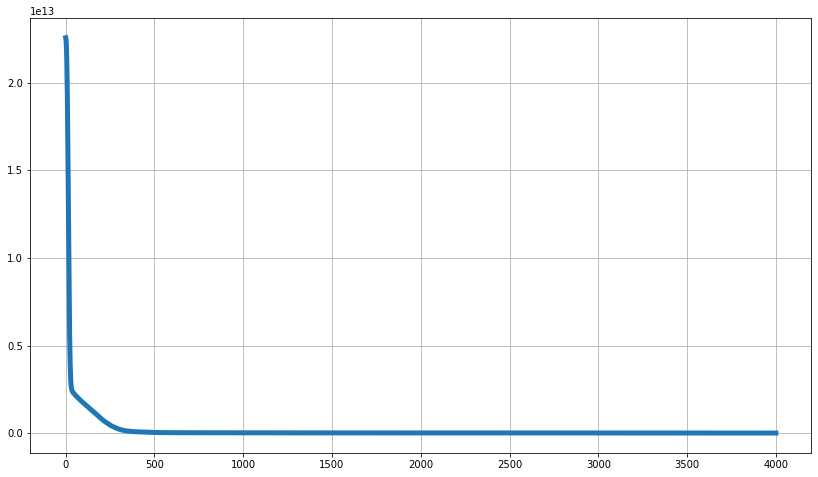

In [47]:
Covergence_df = pd.DataFrame({'Loss':fitting_amfe.history['loss']})
Covergence_df.index +=1
Covergence_df


fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(Covergence_df.index, Covergence_df['Loss'], linewidth = 5);
plt.grid()

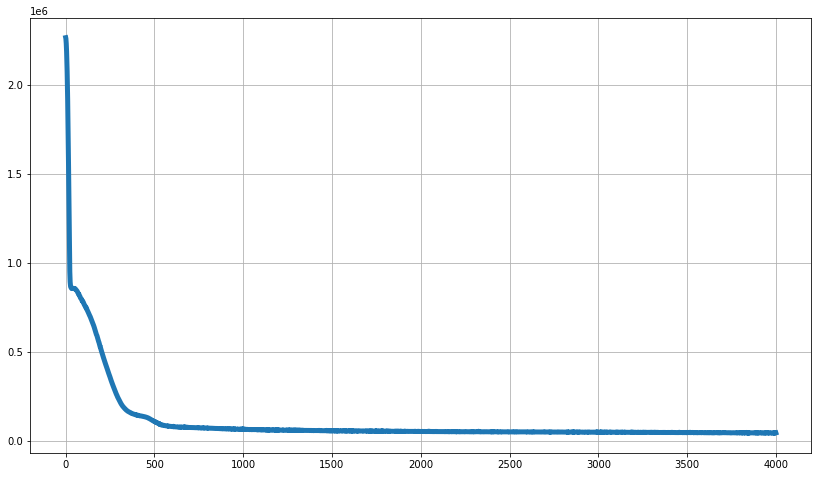

In [48]:
Covergence_dff_MAE = pd.DataFrame({'MAE':fitting_amfe.history['mean_absolute_error']})
Covergence_dff_MAE.index +=1
Covergence_dff_MAE


fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(Covergence_dff_MAE.index, Covergence_dff_MAE['MAE'], linewidth = 5);
plt.grid()

In [49]:
min(fitting_amfe.history['loss'])

8701561856.0

Training parameters (weights and biases) values of trained ANN

In [50]:
customizeAnn = ann_model_for_evaluation.customize() 
# print('Input Layer weights: \n', customizeAnn.layers[0].get_weights()[0])
# print('\n Hidden Layer 1 biases: \n', customizeAnn.layers[0].get_weights()[1])
# print('\n Hidden Layer 1 weights: \n', customizeAnn.layers[1].get_weights()[0])
# print('\n output Layer biases: \n', customizeAnn.layers[1].get_weights()[1])

Evaluating model on train and test sets

In [51]:
ann_evaluation_model_prediction_on_training = ann_model_for_evaluation.predict(input_train_tf)
ann_evaluation_model_prediction_on_test = ann_model_for_evaluation.predict(input_test_tf)


ANN evaluation report &  metrics


In [52]:
ann_model_for_evaluation_customize = ann_model_for_evaluation.customize()
ann_model_for_evaluation_customize.evaluate(input_train_tf, output_train_tf)
print(ann_model_for_evaluation_customize.evaluate(input_test_tf, output_test_tf))

2/2 [==============================] - 0s 7ms/step - loss: 25021357490176.0000 - mean_absolute_error: 3600176.0000
[25021357490176.0, 3600176.0]


In [53]:
np.max(ann_evaluation_model_prediction_on_test)
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e3)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e3)))
y_ticks.shape

(38069,)

Predicted v/s Actual (on training data set)

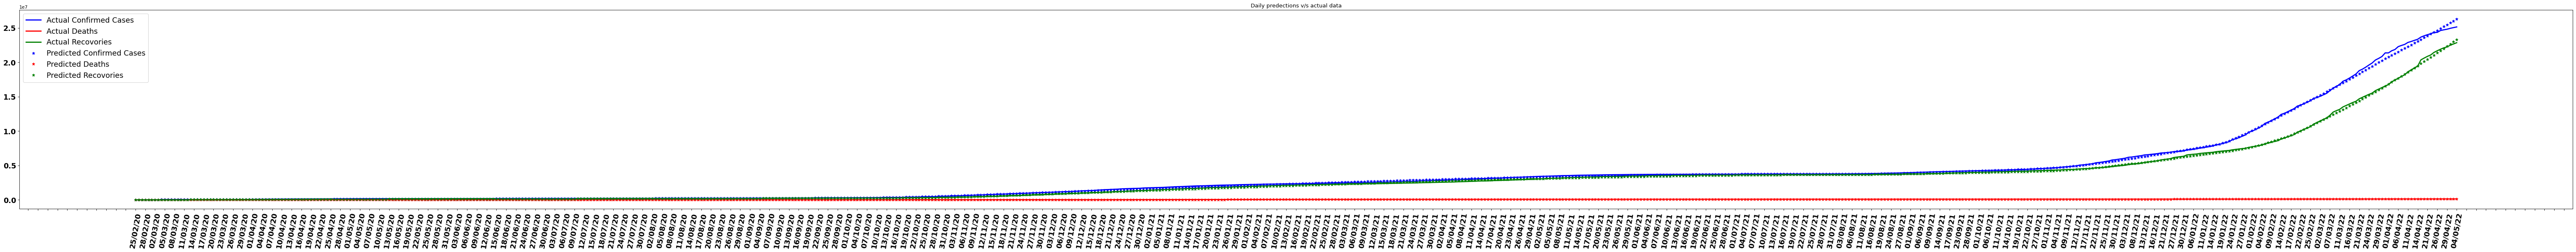

In [54]:
figure(num=None, figsize=(100, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Daily predections v/s actual data")
plt.plot(dates_train, output_train_tf[:,0], 'b', output_train_tf[:,1], 'r', output_train_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates_train, 
         ann_evaluation_model_prediction_on_training[:,0], '*b', 
         ann_evaluation_model_prediction_on_training[:,1], '*r', 
         ann_evaluation_model_prediction_on_training[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

In [55]:
fig = go.Figure()
fig.update_layout(title = "Actual /vs predicted on training dataset")
fig.update_layout(template='plotly_dark')
fig.update_xaxes(tickangle=90, showticklabels = True, type = 'category')


fig.add_trace(go.Scatter(x=dates_train, 
                         y=output_train_tf[:,0],
                         #mode='lines+markers',
                         name='Actual Confirmed Cases',
                         line=dict(color='powderblue', dash='dot')))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=output_train_tf[:,1],
                         #mode='lines+markers',
                         name='Actual Deaths',
                         line=dict(color='indianred',dash='dot')))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=output_train_tf[:,2],
                         #mode='lines+markers',
                         name='Actual Recoveries',
                         line=dict(color='forestgreen', dash='dot')))
                       
fig.add_trace(go.Scatter(x=dates_train, 
                         y=ann_evaluation_model_prediction_on_training[:,0],
                         #mode='lines+markers',
                         name='Predicted Confirmed Cases',
                         line=dict(color='slateblue', width=2)))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=ann_evaluation_model_prediction_on_training[:,1],
                         #mode='lines+markers',
                         name='Predicted Deaths',
                         line=dict(color='palevioletred', width=2)))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=ann_evaluation_model_prediction_on_training[:,2],
                         #mode='lines+markers',
                         name='Predicted Recovories',
                         line=dict(color='seagreen', width=2)))

In [56]:
fig = go.Figure()
fig.update_layout(title = "Actual /vs predicted_Death")
fig.update_layout(template='plotly_dark')
fig.update_xaxes(tickangle=90, showticklabels = True, type = 'category')

fig.add_trace(go.Scatter(x=dates_train, 
                         y=ann_evaluation_model_prediction_on_training[:,1],
                         #mode='lines+markers',
                         name='Predicted Deaths',
                         line=dict(color='indianred', width=2)))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=output_train_tf[:,1],
                         #mode='lines+markers',
                         name='Actual Deaths',
                         line=dict(color='indianred',dash='dot')))

ERRORS

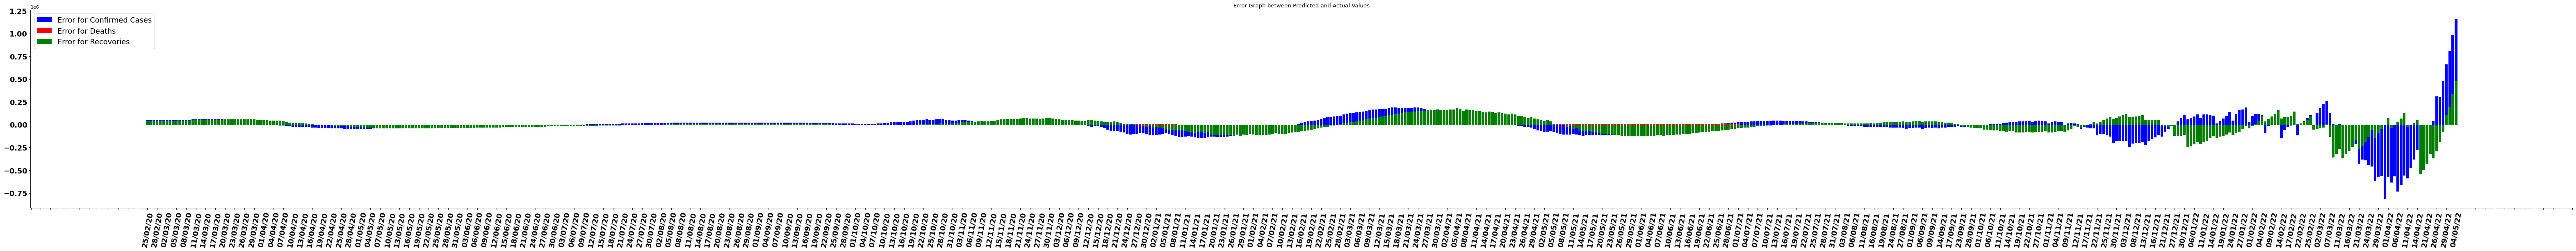

In [57]:
figure(num=None, figsize=(100, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,0].reshape(-1,) - output_train_tf[:,0]), color = 'b')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,1].reshape(-1,) - output_train_tf[:,1]), color = 'r')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,2].reshape(-1,) - output_train_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

predicted v/s Actual (on test dataset)

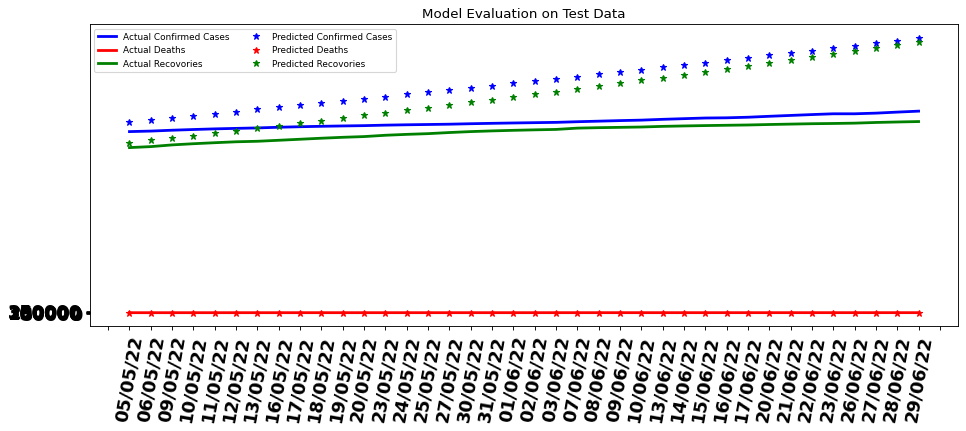

In [58]:
figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Model Evaluation on Test Data")
plt.plot(dates_test, output_test_tf[:,0], 'b', output_test_tf[:,1], 'r', output_test_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates_test, 
         ann_evaluation_model_prediction_on_test[:,0], '*b', 
         ann_evaluation_model_prediction_on_test[:,1], '*r', 
         ann_evaluation_model_prediction_on_test[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], prop = {'size': 8}, loc='upper left', ncol=2)
plt.xticks(rotation=80, weight='bold');
# y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
#                     np.max(ann_evaluation_model_prediction_on_test), 1e4)
# y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e4)))
plt.yticks(np.arange(0,4e5, 5e4), weight='bold',)
plt.show()



fig = go.Figure()
fig.update_layout(title = "Model Evaluation on Test Data")
fig.update_layout(template='plotly_dark')
fig.update_xaxes(tickangle=90, showticklabels = True, type = 'category')


fig.add_trace(go.Scatter(x=dates_train, 
                         y=output_test_tf[:,0],
                         #mode='lines+markers',
                         name='Actual Confirmed Cases',
                         line=dict(color='powderblue', dash='dot')))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=output_test_tf[:,1],
                         #mode='lines+markers',
                         name='Actual Deaths',
                         line=dict(color='indianred',dash='dot')))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=output_test_tf[:,2],
                         #mode='lines+markers',
                         name='Actual Recoveries',
                         line=dict(color='forestgreen', dash='dot')))
                       
fig.add_trace(go.Scatter(x=dates_train, 
                         y=ann_evaluation_model_prediction_on_test[:,0],
                         #mode='lines+markers',
                         name='Predicted Confirmed Cases',
                         line=dict(color='slateblue', width=2)))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=ann_evaluation_model_prediction_on_test[:,1],
                         #mode='lines+markers',
                         name='Predicted Deaths',
                         line=dict(color='palevioletred', width=2)))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=ann_evaluation_model_prediction_on_test[:,2],
                         #mode='lines+markers',
                         name='Predicted Recovories',
                         line=dict(color='seagreen', width=2)))

In [ ]:
# figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Model Evaluation on Test Data")
# plt.plot(dates_test, output_test_tf[:,1], 'r', linewidth = 2.5)
# plt.plot(dates_test, ann_evaluation_model_prediction_on_test[:,1], '*r')
# plt.legend(['Actual Deaths','Predicted Deaths'], prop = {'size': 8}, loc='upper left', ncol=2)
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(np.arange(0,4e5, 5e4), weight='bold',)
# plt.show()

# fig = go.Figure()
# fig.update_layout(title = "Model Evaluation on Test Data")
# fig.update_layout(template='plotly_dark')
# fig.update_xaxes(tickangle=90, showticklabels = True, type = 'category')


# fig.add_trace(go.Scatter(x=dates_train, 
#                          y=output_test_tf[:,1],
#                          #mode='lines+markers',
#                          name='Actual Deaths',
#                          line=dict(color='indianred',dash='dot')))

# fig.add_trace(go.Scatter(x=dates_train, 
#                          y=ann_evaluation_model_prediction_on_test[:,1],
#                          #mode='lines+markers',
#                          name='Predicted Deaths',
#                          line=dict(color='palevioletred', width=2)))


Errors (predection v/s test)

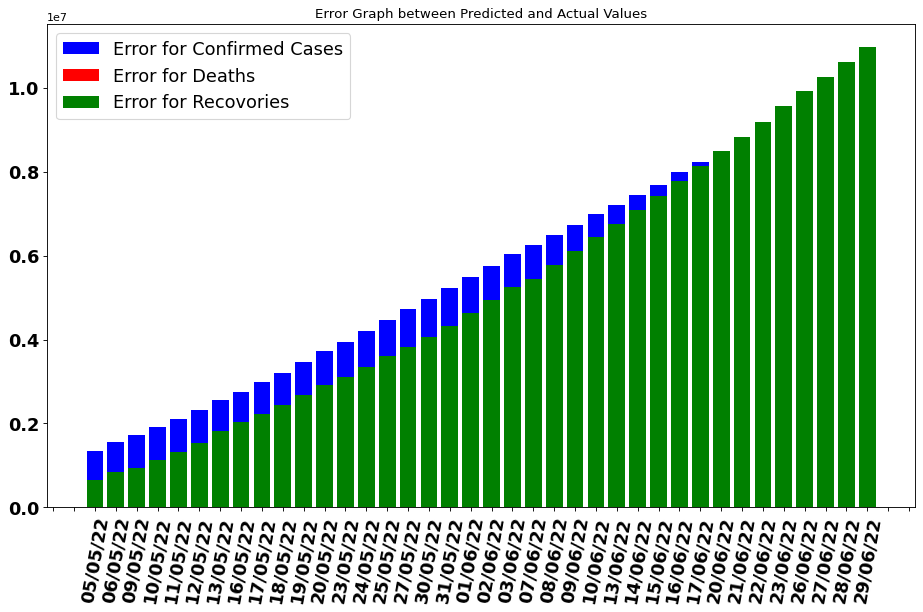

In [59]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,0].reshape(-1,) - output_test_tf[:,0]), color = 'b')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,1].reshape(-1,) - output_test_tf[:,1]), color = 'r')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,2].reshape(-1,) - output_test_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

###Training Actual data and predecticed data 



After the model has been reviewed, the entire set of data is utilized to train the model, and forecast future cases.



In [60]:
output_data_tf = tf.convert_to_tensor(np.array(conf_death_recov), dtype=tf.float32)
input_data_tf = tf.convert_to_tensor(np.array(input_data_scaled), dtype=tf.float32)
ann_model_for_future = annModel(input_data_tf, output_data_tf)
ann_model_for_future.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               1400      
                                                                 
 dense_3 (Dense)             (None, 3)                 603       
                                                                 
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


In [61]:
fitting_amff = ann_model_for_future.fit(best_epochs)

Streaming output truncated to the last 5000 lines.
24/24 [==============================] - 0s 2ms/step - loss: 328997830656.0000 - mean_absolute_error: 219068.9688
Epoch 1502/4000
24/24 [==============================] - 0s 3ms/step - loss: 330400268288.0000 - mean_absolute_error: 219167.2969
Epoch 1503/4000
24/24 [==============================] - 0s 2ms/step - loss: 329512321024.0000 - mean_absolute_error: 219092.0781
Epoch 1504/4000
24/24 [==============================] - 0s 2ms/step - loss: 336014966784.0000 - mean_absolute_error: 220563.6562
Epoch 1505/4000
24/24 [==============================] - 0s 2ms/step - loss: 329380986880.0000 - mean_absolute_error: 219006.9375
Epoch 1506/4000
24/24 [==============================] - 0s 2ms/step - loss: 329619963904.0000 - mean_absolute_error: 219159.0156
Epoch 1507/4000
24/24 [==============================] - 0s 2ms/step - loss: 332491096064.0000 - mean_absolute_error: 219855.7188
Epoch 1508/4000
24/24 [==============================] 

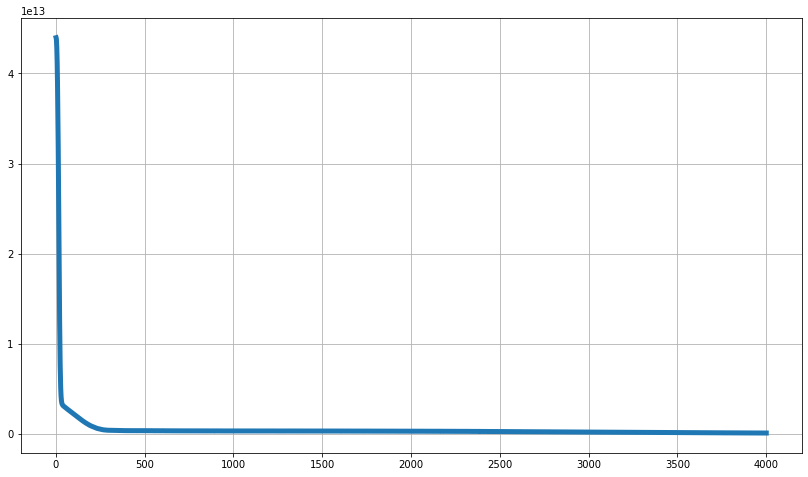

In [62]:
Covergence_dff = pd.DataFrame({'Loss':fitting_amff.history['loss']})
Covergence_dff.index +=1
Covergence_dff

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(Covergence_dff.index, Covergence_dff['Loss'], linewidth = 5);
plt.grid()



127908.65625


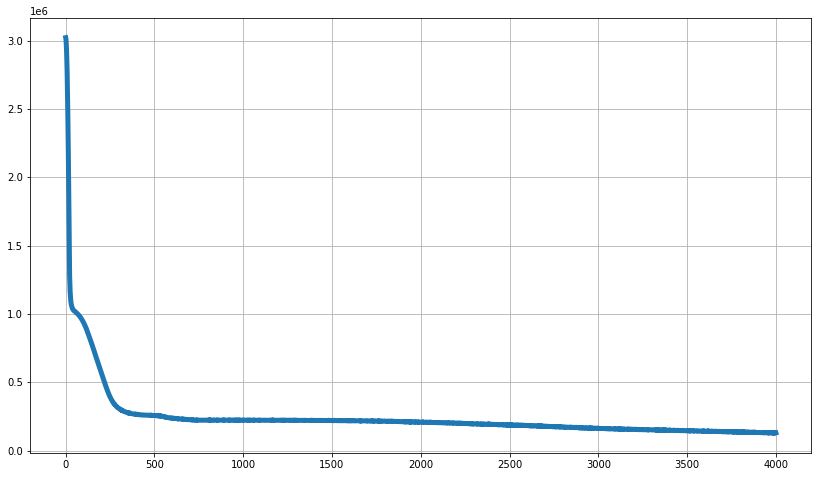

In [63]:
Covergence_dff_MAE = pd.DataFrame({'MAE':fitting_amff.history['mean_absolute_error']})
Covergence_dff_MAE.index +=1
Covergence_dff_MAE

print(min(np.array(fitting_amff.history['mean_absolute_error'])))

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(Covergence_dff_MAE.index, Covergence_dff_MAE['MAE'], linewidth = 5);
plt.grid()

Model Evaluation on training data (whole data this time)




In [64]:
ann_future_model_prediction_on_training = ann_model_for_future.predict(input_data_tf)


Predicting all 3 Future Cases


In [65]:
future_data, scaled_future_data, future_dates = generate_future_data(input_data[:,1], 10)
all_cases_future = ann_model_for_future.predict(scaled_future_data)

Evaluating metrics of trained ANN

In [66]:
ann_model_for_future_customize = ann_model_for_future.customize()
ann_model_for_future_customize.evaluate(input_data_tf, output_data_tf)

24/24 [==============================] - 0s 1ms/step - loss: 108181045248.0000 - mean_absolute_error: 127307.8125


[108181045248.0, 127307.8125]

Dataframe of predicted cases by proposed ANN




In [71]:
predection_DF = pd.DataFrame(all_cases_future, index = future_dates, columns = ['Confirmed', 'Deaths', 'Recoveries'])

predection_DF

,Confirmed,Deaths,Recoveries
29/06/22,29630792.0,141945.859375,29544802.0
30/06/22,29785640.0,141992.328125,29788680.0
01/07/22,29940920.0,142036.218750,30033624.0
02/07/22,30096624.0,142077.562500,30279640.0
03/07/22,30252762.0,142116.343750,30526738.0
04/07/22,30409328.0,142152.531250,30774926.0
05/07/22,30566318.0,142186.109375,31024192.0
06/07/22,30723748.0,142217.093750,31274548.0
07/07/22,30881600.0,142245.359375,31526010.0
08/07/22,31039884.0,142271.062500,31778562.0


Plotting the MOdel fitting on Training data 

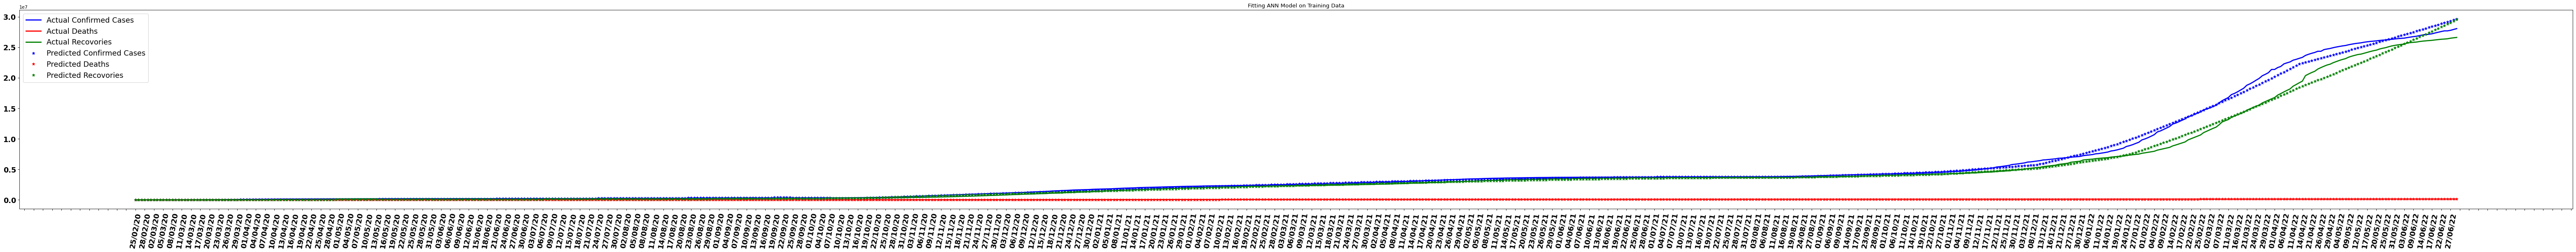

In [72]:
figure(num=None, figsize=(100, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Fitting ANN Model on Training Data")
plt.plot(dates, output_data_tf[:,0], 'b', output_data_tf[:,1], 'r', output_data_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates, 
         ann_future_model_prediction_on_training[:,0], '*b', 
         ann_future_model_prediction_on_training[:,1], '*r', 
         ann_future_model_prediction_on_training[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

In [73]:
fig = go.Figure()
fig.update_layout(title = "Fitting ANN Model on Training Data")
fig.update_layout(template='plotly_dark')
fig.update_xaxes(tickangle=90, showticklabels = True, type = 'category')


fig.add_trace(go.Scatter(x=dates_train, 
                         y=output_data_tf[:,0],
                         #mode='lines+markers',
                         name='Actual Confirmed Cases',
                         line=dict(color='powderblue', dash='dot')))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=output_data_tf[:,1],
                         #mode='lines+markers',
                         name='Actual Deaths',
                         line=dict(color='indianred',dash='dot')))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=output_data_tf[:,2],
                         #mode='lines+markers',
                         name='Actual Recoveries',
                         line=dict(color='forestgreen', dash='dot')))
                       
fig.add_trace(go.Scatter(x=dates_train, 
                         y=ann_future_model_prediction_on_training[:,0],
                         #mode='lines+markers',
                         name='Predicted Confirmed Cases',
                         line=dict(color='slateblue', width=2)))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=ann_future_model_prediction_on_training[:,1],
                         #mode='lines+markers',
                         name='Predicted Deaths',
                         line=dict(color='palevioletred', width=2)))

fig.add_trace(go.Scatter(x=dates_train, 
                         y=ann_future_model_prediction_on_training[:,2],
                         #mode='lines+markers',
                         name='Predicted Recovories',
                         line=dict(color='seagreen', width=2)))

Error plotting Predicted v/s Actual

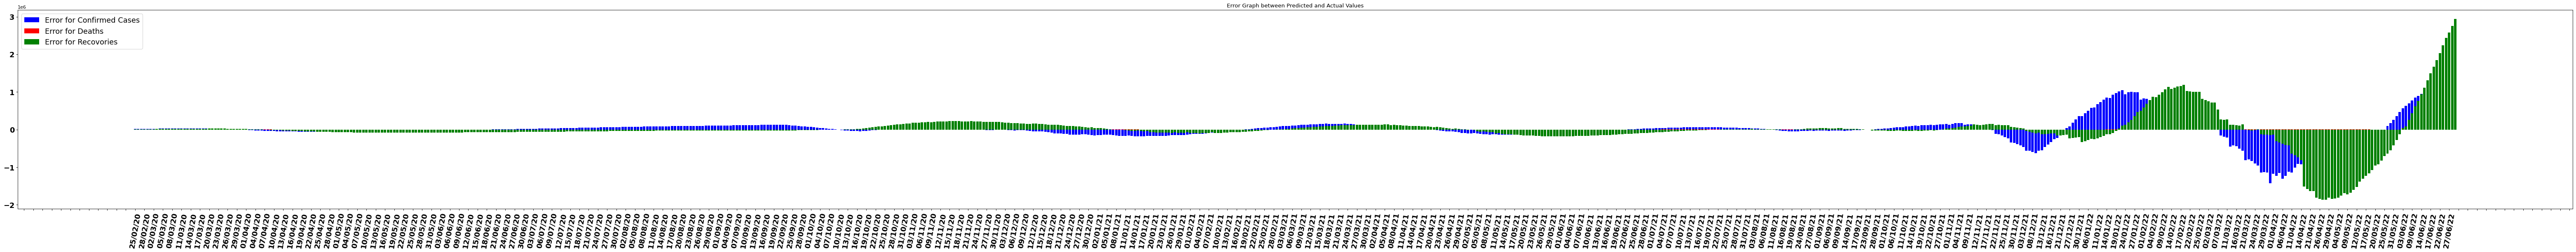

In [75]:
figure(num=None, figsize=(100, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates,(ann_future_model_prediction_on_training[:,0].reshape(-1,) - output_data_tf[:,0]), color = 'b')
plt.bar(dates,(ann_future_model_prediction_on_training[:,1].reshape(-1,) - output_data_tf[:,1]), color = 'r')
plt.bar(dates,(ann_future_model_prediction_on_training[:,2].reshape(-1,) - output_data_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

Plotting model fitting Training data

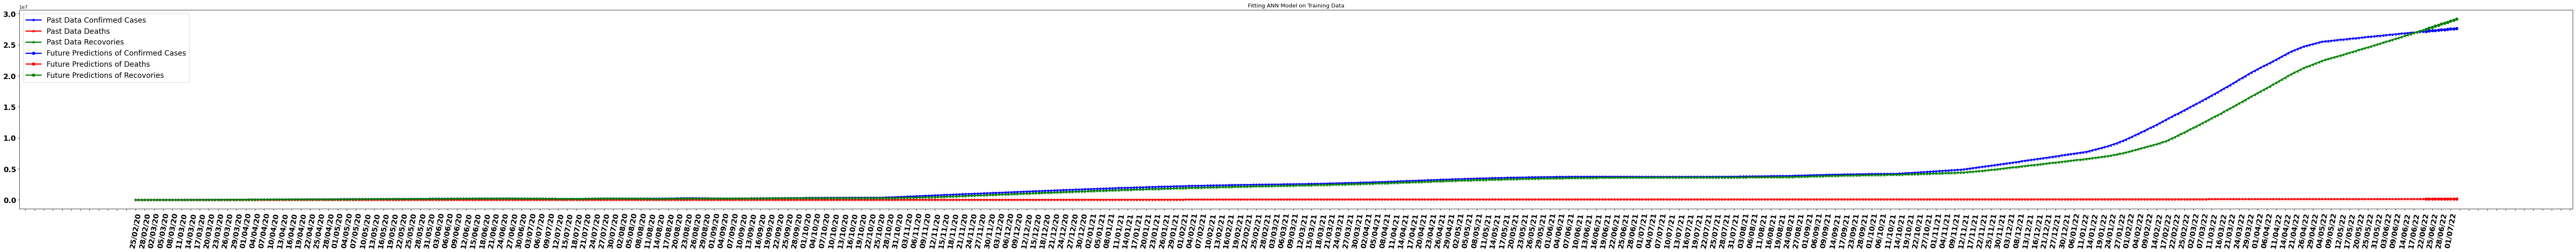

In [ ]:
figure(num=None, figsize=(100, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Fitting ANN Model on Training Data")
plt.plot(dates, 
         ann_future_model_prediction_on_training[:,0], '-*b', 
         ann_future_model_prediction_on_training[:,1], '-*r', 
         ann_future_model_prediction_on_training[:,2], '-*g',
         future_dates, all_cases_future[:,0], '-ob', 
         future_dates, all_cases_future[:,1], '-or', 
         future_dates, all_cases_future[:,2], '-og', 
         linewidth = 2.5)
plt.legend(['Past Data Confirmed Cases', 'Past Data Deaths','Past Data Recovories', 'Future Predictions of Confirmed Cases', 
            'Future Predictions of Deaths','Future Predictions of Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

In [ ]:
# fig = go.Figure()
# fig.update_layout(title = "Fitting ANN Model on Training Data")
# fig.update_layout(template='plotly_dark')
# fig.update_xaxes(tickangle=90, showticklabels = True, type = 'category')


# fig.add_trace(go.Scatter(x=future_dates, 
#                          y=all_cases_future[:,0],
#                          mode='lines+markers',
#                          name='Future Predictions of Confirmed Cases',
#                          line=dict(color='powderblue', dash='dot')))

# fig.add_trace(go.Scatter(x=future_dates, 
#                          y=all_cases_future[:,1],
#                          mode='lines+markers',
#                          name='Future Predictions of Deaths',
#                          line=dict(color='indianred',dash='dot')))

# fig.add_trace(go.Scatter(x=future_dates, 
#                          y=all_cases_future[:,2],
#                          mode='lines+markers',
#                          name='Future Predictions of Recovories',
#                          line=dict(color='forestgreen', dash='dot')))
                       
# fig.add_trace(go.Scatter(x=dates, 
#                          y=ann_future_model_prediction_on_training[:,0],
#                          #mode='lines+markers',
#                          name='Past Data Confirmed Cases',
#                          line=dict(color='slateblue', width=2)))

# fig.add_trace(go.Scatter(x=dates, 
#                          y=ann_future_model_prediction_on_training[:,1],
#                          #mode='lines+markers',
#                          name='Past Data Deaths',
#                          line=dict(color='palevioletred', width=2)))

# fig.add_trace(go.Scatter(x=dates, 
#                          y=ann_future_model_prediction_on_training[:,2],
#                          #mode='lines+markers',
#                          name='Past Data Recovories',
#                          line=dict(color='seagreen', width=2)))